In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\retail_sales.csv")
df.head()


,OrderID,Date,Product,Category,Quantity,Price,CustomerType,Region
0,10001,2023-04-13,Jeans,Fashion,3,25557,Returning,North
1,10002,2023-12-15,TV,Home Appliances,2,56119,New,East
2,10003,2023-09-28,T-Shirt,Fashion,5,17150,New,North
3,10004,2023-04-17,Shoes,Fashion,3,15952,Returning,West
4,10005,2023-03-13,Headphones,Electronics,2,37590,Returning,East


In [3]:
print(df.shape)

(5000, 8)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       5000 non-null   int64 
 1   Date          5000 non-null   object
 2   Product       5000 non-null   object
 3   Category      5000 non-null   object
 4   Quantity      5000 non-null   int64 
 5   Price         5000 non-null   int64 
 6   CustomerType  5000 non-null   object
 7   Region        5000 non-null   object
dtypes: int64(3), object(5)
memory usage: 312.6+ KB
None


In [5]:
print(df.describe())

            OrderID     Quantity         Price
count   5000.000000  5000.000000   5000.000000
mean   12500.500000     3.030200  29964.980200
std     1443.520003     1.418482  17313.605148
min    10001.000000     1.000000    219.000000
25%    11250.750000     2.000000  15122.000000
50%    12500.500000     3.000000  29496.500000
75%    13750.250000     4.000000  45366.250000
max    15000.000000     5.000000  59996.000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [12]:
df.head()

,OrderID,Date,Product,Category,Quantity,Price,CustomerType,Region,Month,Year
0,10001,2023-04-13,Jeans,Fashion,3,25557,Returning,North,4,2023
1,10002,2023-12-15,TV,Home Appliances,2,56119,New,East,12,2023
2,10003,2023-09-28,T-Shirt,Fashion,5,17150,New,North,9,2023
3,10004,2023-04-17,Shoes,Fashion,3,15952,Returning,West,4,2023
4,10005,2023-03-13,Headphones,Electronics,2,37590,Returning,East,3,2023


In [14]:
df['Revenue'] = df['Quantity'] * df['Price']
df.Revenue

0        76671
1       112238
2        85750
3        47856
4        75180
         ...  
4995     67134
4996     15298
4997     24261
4998    156270
4999     60000
Name: Revenue, Length: 5000, dtype: int64

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df.isnull().sum()


OrderID         0
Date            0
Product         0
Category        0
Quantity        0
Price           0
CustomerType    0
Region          0
Month           0
Year            0
Revenue         0
dtype: int64

In [17]:
df['Category'] = df['Category'].fillna(df['Category'].mode()[0])
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

In [18]:
df.head()

,OrderID,Date,Product,Category,Quantity,Price,CustomerType,Region,Month,Year,Revenue
0,10001,2023-04-13,Jeans,Fashion,3,25557,Returning,North,4,2023,76671
1,10002,2023-12-15,TV,Home Appliances,2,56119,New,East,12,2023,112238
2,10003,2023-09-28,T-Shirt,Fashion,5,17150,New,North,9,2023,85750
3,10004,2023-04-17,Shoes,Fashion,3,15952,Returning,West,4,2023,47856
4,10005,2023-03-13,Headphones,Electronics,2,37590,Returning,East,3,2023,75180


In [20]:
df['CustomerType'] = df['CustomerType'].fillna(df['CustomerType'].mode()[0])
df.CustomerType

0       Returning
1             New
2             New
3       Returning
4       Returning
          ...    
4995          New
4996          New
4997    Returning
4998    Returning
4999          New
Name: CustomerType, Length: 5000, dtype: object

In [21]:
total_revenue = df['Revenue'].sum()
total_revenue


np.int64(454929456)

In [22]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products


Product
TV              49863926
Shoes           49860963
T-Shirt         49503589
Laptop          46313524
Mobile          45765516
Watch           45550567
Backpack        42804939
Jeans           41801153
Headphones      41747520
Refrigerator    41717759
Name: Revenue, dtype: int64

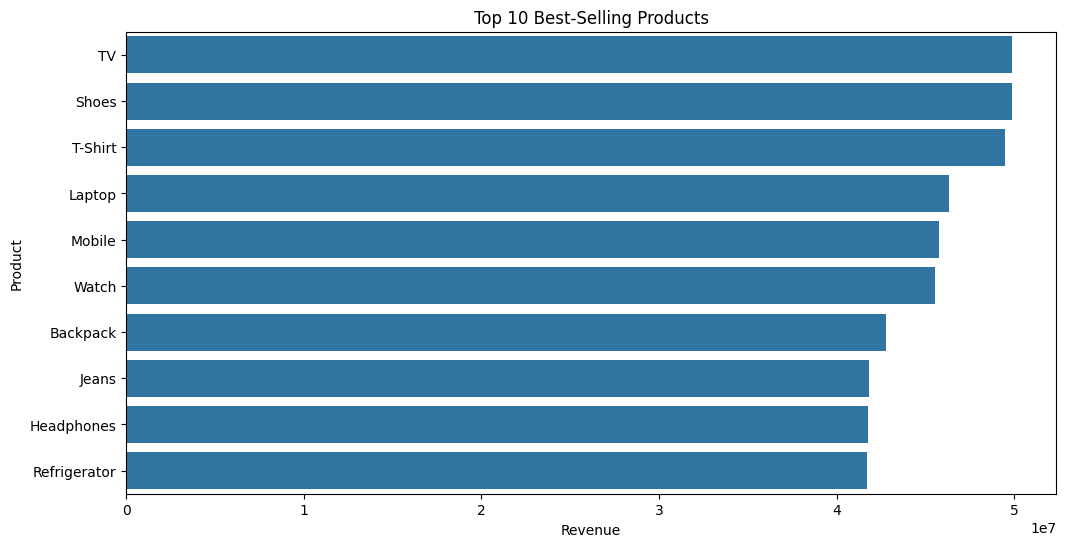

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()


In [24]:
cat_rev = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
cat_rev


Category
Fashion            229521211
Electronics        133826560
Home Appliances     91581685
Name: Revenue, dtype: int64

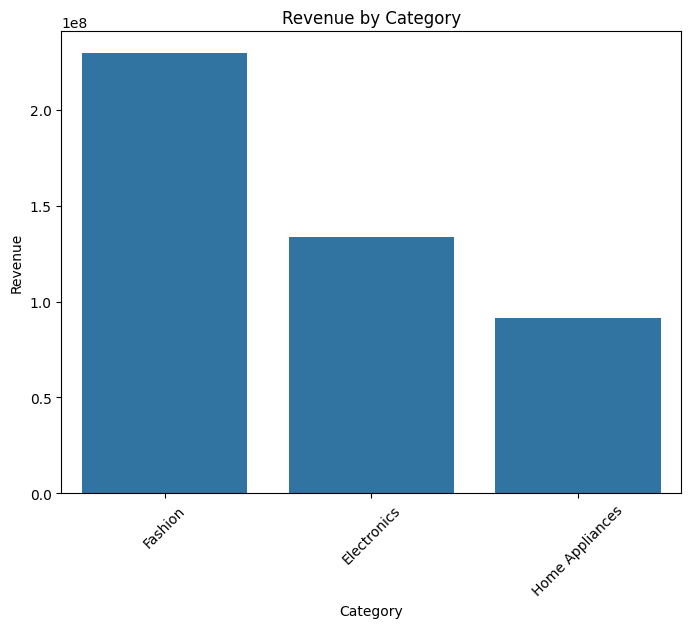

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=cat_rev.index, y=cat_rev.values)
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


In [26]:
region_rev = df.groupby('Region')['Revenue'].sum()
region_rev


Region
East     110702226
North    115669816
South    115264815
West     113292599
Name: Revenue, dtype: int64

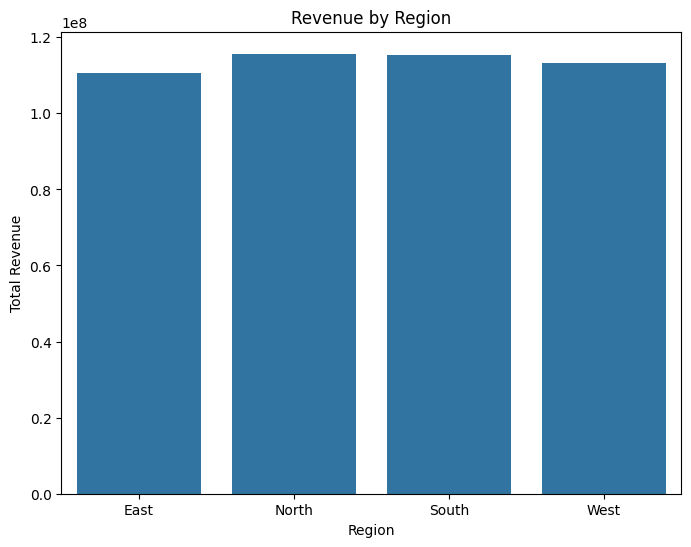

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x=region_rev.index, y=region_rev.values)
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()


In [28]:
monthly_sales = df.groupby('Month')['Revenue'].sum()
monthly_sales


Month
1     36211561
2     33944565
3     36611794
4     39661439
5     40768603
6     40535526
7     34467722
8     39368499
9     39819799
10    37336996
11    37037285
12    39165667
Name: Revenue, dtype: int64

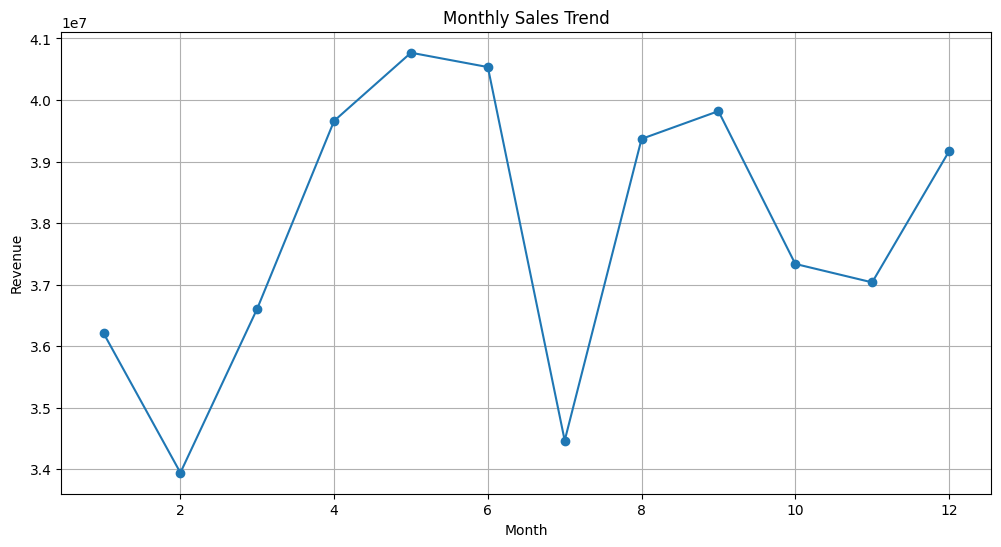

In [29]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid()
plt.show()


In [30]:
cust_rev = df.groupby('CustomerType')['Revenue'].sum()
cust_rev


CustomerType
New          229027127
Returning    225902329
Name: Revenue, dtype: int64

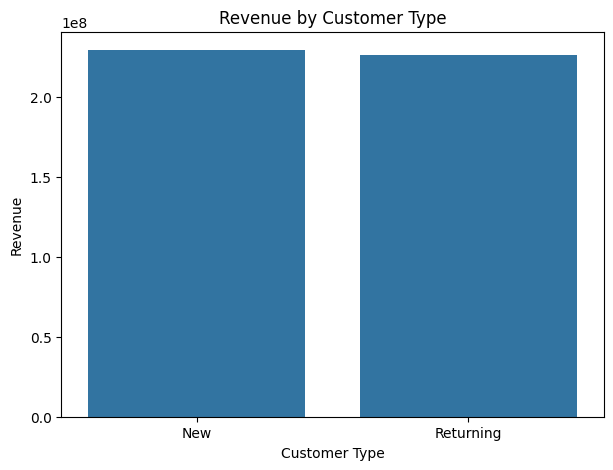

In [31]:
plt.figure(figsize=(7,5))
sns.barplot(x=cust_rev.index, y=cust_rev.values)
plt.title("Revenue by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Revenue")
plt.show()


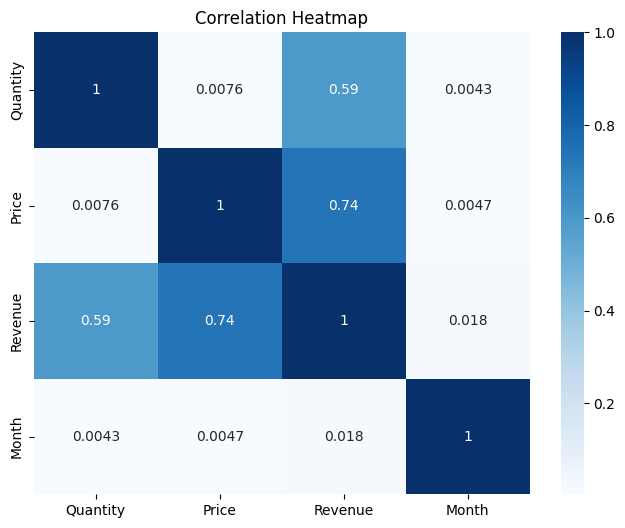

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Quantity','Price','Revenue','Month']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


Key Insights

In [33]:
print("✔ Total Revenue:", total_revenue)
print("✔ Best Selling Products:\n", top_products)
print("✔ Highest Revenue Category:", cat_rev.idxmax())
print("✔ Highest Revenue Region:", region_rev.idxmax())
print("✔ Best Month for Sales:", monthly_sales.idxmax())
print("✔ Customer Type with Highest Revenue:", cust_rev.idxmax())


✔ Total Revenue: 454929456
✔ Best Selling Products:
 Product
TV              49863926
Shoes           49860963
T-Shirt         49503589
Laptop          46313524
Mobile          45765516
Watch           45550567
Backpack        42804939
Jeans           41801153
Headphones      41747520
Refrigerator    41717759
Name: Revenue, dtype: int64
✔ Highest Revenue Category: Fashion
✔ Highest Revenue Region: North
✔ Best Month for Sales: 5
✔ Customer Type with Highest Revenue: New
